<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [6]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [8]:
#Importation du fichier population.csv
df_population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
df_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
df_sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [12]:
#Consulter le nombre de colonnes
#Méthode_1 avec len() sur columns
nombre_colonnes = len(df_population.columns)
print("Nombre de colonnes du df_population:", nombre_colonnes)

#Méthode_2 avec shape
# Nombre de colonnes
nombre_colonnes = df_population.shape[1]
print("Nombre de colonnes du df_population:", nombre_colonnes)

#Méthode_3 avec info()
df_population.info()

#La nature des données dans chacune des colonnes
print("La nature des données dans chacune des colonnes est :")
print(df_population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
# Nombre de valeurs non nulles dans chaque colonne
nombre_valeurs_par_colonne = df_population.count()
print("Nombre de valeurs présentes dans chaque colonne Nombre de colonnes du df_population:")
print(nombre_valeurs_par_colonne)

# Nombre total de valeurs dans chaque colonne
nombre_lignes = df_population.shape[0]
nombre_valeurs_total = nombre_lignes
print("Nombre total de valeurs par colonne (y compris les valeurs nulles) :")
print(nombre_valeurs_total)

Nombre de colonnes du df_population: 3
Nombre de colonnes du df_population: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
La nature des données dans chacune des colonnes est :
Zone       object
Année       int64
Valeur    float64
dtype: object
Nombre de valeurs présentes dans chaque colonne Nombre de colonnes du df_population:
Zone      1416
Année     1416
Valeur    1416
dtype: int64
Nombre total de valeurs par colonne (y compris les valeurs nulles) :
1416


In [13]:
#Affichage les 5 premières lignes de la table
df_population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [14]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
df_population['Valeur']=df_population['Valeur'] * 1000

In [15]:
#changement du nom de la colonne Valeur par Population
df_population.rename(columns={'Valeur':'Population'},inplace=True)

In [16]:
#Affichage les 5 premières lignes de la table pour voir les modifications
df_population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [18]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [19]:
#Consulter le nombre de colonnes
nombre_colonnes = df_dispo_alimentaire.shape[1]
print("Nombre de colonnes du df_dispo_alimentaire:", nombre_colonnes)

Nombre de colonnes du df_dispo_alimentaire: 18


In [20]:
#Affichage les 5 premières lignes de la table
df_dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#remplacement des NaN dans le dataset par des 0
df_dispo_alimentaire.fillna(0,inplace=True)

In [22]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
#Création d'une liste des colonnes à multiplier
columns = ['Aliments pour animaux', 'Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']
#Création d'une boucle pour appliquer la multiplication sur toutes les valeurs des colonnes (s'agissant de milliers de tonnes, il faut multiplier par 1_000_000)
for column in columns:
    if column in df_dispo_alimentaire.columns:
        df_dispo_alimentaire[column]=(df_dispo_alimentaire[column] * 1_000_000)

In [23]:
#Affichage les 5 premières lignes de la table
df_dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [25]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [26]:
#Consulter le nombre de colonnes
nombre_colonnes = df_aide_alimentaire.shape[1]
print("Nombre de colonnes du df_aide_alimentaire:", nombre_colonnes)

Nombre de colonnes du df_aide_alimentaire: 4


In [27]:
#Affichage les 5 premières lignes de la table
df_aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [28]:
#changement du nom de la colonne Pays bénéficiaire par Zone
df_aide_alimentaire.rename(columns={'Pays bénéficiaire':'Zone'},inplace=True)

In [29]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
df_aide_alimentaire['Valeur']=df_aide_alimentaire['Valeur'] * 1_000

In [30]:
#Affichage les 5 premières lignes de la table
df_aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [32]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [33]:
#Consulter le nombre de colonnes
nombre_colonnes = df_sous_nutrition.shape[1]
print("Nombre de colonnes du df_sous_nutrition:", nombre_colonnes)

Nombre de colonnes du df_sous_nutrition: 3


In [34]:
#Afficher les 5 premières lignes de la table
df_sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [35]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

NameError: name 'sous_nutrition' is not defined

In [79]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
df_sous_nutrition['Valeur'] = pd.to_numeric(df_sous_nutrition['Valeur'],errors='coerce')

#Puis remplacement des NaN en 0
df_sous_nutrition.fillna(0,inplace=True)

In [80]:
#changement du nom de la colonne Valeur par sous_nutrition
df_sous_nutrition.rename(columns={'Valeur':'sous_nutrition'},inplace=True)

In [81]:
#Multiplication de la colonne sous_nutrition par 1000000
df_sous_nutrition['sous_nutrition']=df_sous_nutrition['sous_nutrition'] * 1_000_000

In [82]:
#Afficher les 5 premières lignes de la table
df_sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [84]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# On crée un df de sous_nutrition et population pour 2017
df_sous_nutrition_2017=df_sous_nutrition[df_sous_nutrition['Année']=='2016-2018'][['Zone','sous_nutrition']] #Condition de filtrage sur l'année (type:object) dans le df_sous_nutrition et reprise uniquement des colonnes Zone et sous_nutrition
df_population_2017=df_population[df_population['Année']==2017][['Zone', 'Population']] #Condition de filtrage sur l'année (type:int64) dans le df_population et reprise uniquement des colonnes Zone et Population

# Jointure(fusion) du df_nutrition_2017 avec df_population_2017 sur la colonne Zone et création d'un nouveau df_sous_nutrition_2017
df_sous_nutrition_2017=pd.merge(df_sous_nutrition_2017,df_population_2017,on='Zone',how='inner')

In [85]:
#Affichage du dataset
df_sous_nutrition_2017

,Zone,sous_nutrition,Population
0,Afghanistan,10500000.0,36296113.0
1,Afrique du Sud,3100000.0,57009756.0
2,Albanie,100000.0,2884169.0
3,Algérie,1300000.0,41389189.0
4,Allemagne,0.0,82658409.0
...,...,...,...
198,Venezuela (République bolivarienne du),8000000.0,29402484.0
199,Viet Nam,6500000.0,94600648.0
200,Yémen,0.0,27834819.0
201,Zambie,0.0,16853599.0


In [86]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

#Calcul du total de la colonne sous_nutrition du df_sous_nutrition_2017
calcul_sous_nutrition_2017 = df_sous_nutrition_2017['sous_nutrition'].sum()

#Conversion en millards de personnes
calcul_sous_nutrition_2017_milliards = calcul_sous_nutrition_2017 / 1_000_000_000

#Calcul du total de la colonne Population du df_sous_nutrition_2017
calcul_population_2017 = df_sous_nutrition_2017['Population'].sum()

#Conversion en millards de personnes
calcul_population_2017_milliards = calcul_population_2017 / 1_000_000_000

#Calcul en % de la proportion sous_nutrition_2017 par rapport à la population_2017
calcul_proportion_sous_nutrition_2017 = calcul_sous_nutrition_2017 / calcul_population_2017 * 100

#Affichage du résultat
print(f"Le nombre de personnes en état de sous-nutrition en 2017 est de {calcul_sous_nutrition_2017_milliards:.2f} milliard de personnes sur un total de {calcul_population_2017_milliards:.2f}, soit {calcul_proportion_sous_nutrition_2017:.2f} %")

Le nombre de personnes en état de sous-nutrition en 2017 est de 0.54 milliard de personnes sur un total de 7.54, soit 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [88]:
#Combien mange en moyenne un être humain ? Source => 

# 2700 kilocalories/jour/personne https://www.fao.org/4/y4683f/y4683f06.htm

In [89]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_dispo_alimentaire_2017 = pd.merge(df_dispo_alimentaire, df_population_2017, on='Zone', how='left') #On fait une jointure left pour avoir toutes les lignes du df_dispo_alimentaire

In [90]:
#Affichage du nouveau dataframe
df_dispo_alimentaire_2017

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0,636039.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,636039.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0


In [91]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_dispo_alimentaire_2017 ['dispo_kcal'] = df_dispo_alimentaire_2017 ['Disponibilité alimentaire (Kcal/personne/jour)'] * df_dispo_alimentaire_2017 ['Population'] * 365
print("Les kcal disponibles mondialement sont de : {:.0f}".format(df_dispo_alimentaire_2017 ['dispo_kcal'].sum()))

Les kcal disponibles mondialement sont de : 7635429388975815


In [92]:
#Calcul du nombre d'humains pouvant être nourris
# Estimation de la consommation journalière moyenne par personne
kcal_par_personne = 2700 * 365 #Variable kcal_par_personne_par_jour

# Calcul du nombre d'humains pouvant être nourris par jour
calcul_nb_humains_nourris = df_dispo_alimentaire_2017['dispo_kcal'] / kcal_par_personne

# Calcul du total mondial du nombre d'humains pouvant être nourris en milliards
total_mondial_nb_humains_nourris_milliards = calcul_nb_humains_nourris.sum() / 1_000_000_000

# Calcul en % du nbre d'humains pouvant être nourris par rapport à la population totale
calcul_pourcentage_nb_humains_nourris = calcul_nb_humains_nourris.sum() / calcul_population_2017 * 100

print(f"Le nombre total d'humains pouvant être nourris mondialement en 2017 est : {total_mondial_nb_humains_nourris_milliards:.2f} milliards de personnes, soit {calcul_pourcentage_nb_humains_nourris:.2f} %")

Le nombre total d'humains pouvant être nourris mondialement en 2017 est : 7.75 milliards de personnes, soit 102.70 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [94]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_dispo_alimentaire_2017_vegetaux = df_dispo_alimentaire_2017 [df_dispo_alimentaire_2017 ['Origine'] == 'vegetale']

In [95]:
#Calcul du nombre de kcal disponible pour les végétaux
print("Les kcal disponibles mondialement pour les végétaux sont de : {:.0f}".format(df_dispo_alimentaire_2017_vegetaux ['dispo_kcal'].sum()))

Les kcal disponibles mondialement pour les végétaux sont de : 6300178937197865


In [96]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
# Calcul du nombre d'humains pouvant être nourris par jour
calcul_nb_humains_nourris_vegetaux = df_dispo_alimentaire_2017_vegetaux ['dispo_kcal'] / kcal_par_personne

# Calcul du total mondial du nombre d'humains pouvant être nourris en milliards
total_mondial_nb_humains_nourris_vegetaux_milliards = calcul_nb_humains_nourris_vegetaux.sum() / 1_000_000_000

# Calcul en % du nbre d'humains pouvant être nourris par rapport à la population totale
calcul_pourcentage_nb_humains_nourris = calcul_nb_humains_nourris_vegetaux.sum() / calcul_population_2017 * 100

# Affichage du résultat en milliards de personnes
print(f"Le nombre total d'humains pouvant être nourris mondialement avec les végétaux en 2017 est : {total_mondial_nb_humains_nourris_vegetaux_milliards:.2f} milliards de personnes soit {calcul_pourcentage_nb_humains_nourris:.2f} %")

Le nombre total d'humains pouvant être nourris mondialement avec les végétaux en 2017 est : 6.39 milliards de personnes soit 84.74 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [98]:
#Calcul de la disponibilité totale
#1ère équation : somme de la colonne Disponibilité intérieure
calcul_disponibilite_interieure_monde_2017 = df_dispo_alimentaire_2017 ['Disponibilité intérieure'].sum()

#2ème équation : somme des colonnes Production + Importation - Exportation + Variation de stock
calcul_disponibilite_interieure_monde_2017_equ_2 = (df_dispo_alimentaire_2017 ['Production'].sum() + df_dispo_alimentaire_2017 ['Importations - Quantité'].sum() - df_dispo_alimentaire_2017 ['Exportations - Quantité'].sum() + df_dispo_alimentaire_2017 ['Variation de stock'].sum())

#3ème équation : somme des colonnes Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement
calcul_disponibilite_interieure_monde_2017_equ_3 = (df_dispo_alimentaire_2017 ['Aliments pour animaux'].sum() + df_dispo_alimentaire_2017 ['Autres Utilisations'].sum() + df_dispo_alimentaire_2017 ['Nourriture'].sum() + df_dispo_alimentaire_2017 ['Pertes'].sum() + df_dispo_alimentaire_2017 ['Semences'].sum() + df_dispo_alimentaire_2017 ['Traitement'].sum())

#Affichage des résultats des 3 équations
print ("1ère équation : {}".format(calcul_disponibilite_interieure_monde_2017))
print ("2ème équation : {}".format(calcul_disponibilite_interieure_monde_2017_equ_2))
print ("3ème équation : {}".format(calcul_disponibilite_interieure_monde_2017_equ_3))

1ère équation : 9848994000000.0
2ème équation : 9849173000000.0
3ème équation : 9858592000000.0


In [99]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
#Création d'une liste pour les colonnes à traiter
columns = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']

#Dans le ppt, je souhaite afficher les résultats sous forme de graphique avec les valeurs et les pourcentages.
#Je vais donc créer un dateframe qui renvoie les résultats en valeurs et pourcentages d'une boucle sur les différents colonnes

#Création d'un dictionnaire pour stocker les résultats
resultats = {}

#Création de la boucle pour calculer les valeurs et les pourcentages et les stocker dans le dictionnaire
for column in columns:
    valeurs_tonnes = df_dispo_alimentaire_2017[column].sum() / 1_000
    valeurs_pourcentages = (valeurs_tonnes * 1_000) / calcul_disponibilite_interieure_monde_2017 * 100
    resultats[column] = [valeurs_tonnes, valeurs_pourcentages]

# Conversion du dictionnaire en DataFrame
df_resultat = pd.DataFrame.from_dict(resultats, orient='index', columns=['Valeur_en_tonnes', 'Valeur_%']).reset_index()

# Renommer la colonne 'index' en 'Utilisation'
df_resultat.rename(columns={'index': 'Utilisation'}, inplace=True)

# Arrondir les valeurs pour l'affichage
df_resultat ['Valeur_%'] = df_resultat ['Valeur_%'].round(2)

# Affichage du dataframe
df_resultat

,Utilisation,Valeur_en_tonnes,Valeur_%
0,Aliments pour animaux,1.304245e+09,13.24
1,Autres Utilisations,8.650230e+08,8.78
2,Nourriture,4.876258e+09,49.51
3,Pertes,4.536980e+08,4.61
4,Semences,1.546810e+08,1.57
5,Traitement,2.204687e+09,22.38


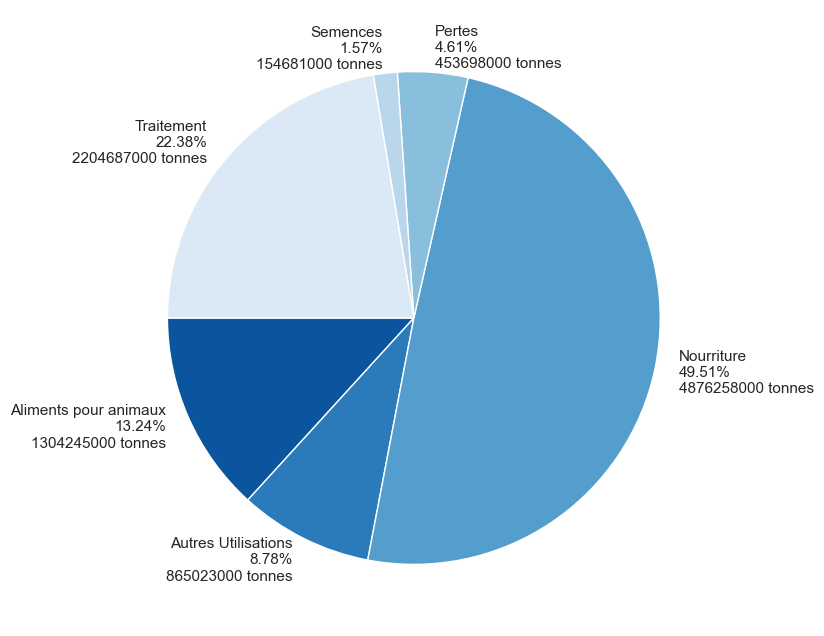

In [100]:
#Graphique
# Création du pie chart
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid', palette='pastel')

# Extraire les valeurs et labels
valeurs = df_resultat['Valeur_en_tonnes']
labels = df_resultat['Utilisation']
pourcentages = df_resultat['Valeur_%']

# Création des étiquettes avec pourcentages et tonnes
etiquettes = [f'{u}\n{p}%\n{v:.0f} tonnes' for u, p, v in zip(labels, pourcentages, valeurs)]

# Création du pie chart avec les étiquettes personnalisées
plt.pie(valeurs, labels=etiquettes, startangle=180, colors=sns.color_palette('Blues_r', len(labels)))

# Ajouter un titre
# plt.title("Répartition des différentes utilisations de la disponibilité intérieure") - Titre si nécessaire

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_dispo_int_.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [102]:
#Création d'une liste avec toutes les variables
cereales = [
    'Blé',
    'Seigle',
    'Orge',
    'Avoine',
    'Maïs',
    'Riz (Eq Blanchi)',
    'Sorgho',
    'Millet',
    'Céréales, Autres'
]

In [103]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_dispo_alimentaire_2017_cereales = df_dispo_alimentaire_2017_vegetaux[df_dispo_alimentaire_2017_vegetaux['Produit'].isin(cereales)]

In [104]:
# Calcul des proportions d'utilisation des céréales entre l'alimentation animale et l'alimentation humaine
calcul_proportion_alim_animaux_2 = (df_dispo_alimentaire_2017_cereales['Aliments pour animaux'].sum() / df_dispo_alimentaire_2017_cereales['Disponibilité intérieure'].sum() * 100).round(2)
calcul_proportion_alim_humaine_2 = (df_dispo_alimentaire_2017_cereales['Nourriture'].sum() / df_dispo_alimentaire_2017_cereales['Disponibilité intérieure'].sum() * 100).round(2)
print(f"La proportion d'utilisation des céréales pour l'alimentation animale est de {calcul_proportion_alim_animaux_2} % et pour l'utilisation humaine de {calcul_proportion_alim_humaine_2} %")

La proportion d'utilisation des céréales pour l'alimentation animale est de 36.29 % et pour l'utilisation humaine de 42.75 %


In [105]:
#Affichage de la proportion d'alimentation animale
# Calculer la somme totale de la disponibilité intérieure et de l'alimentation animale pour chaque céréales
grouped_sum_dispo_int = df_dispo_alimentaire_2017_cereales.groupby(['Produit'])['Disponibilité intérieure'].sum()
grouped_sum_alim_animaux = df_dispo_alimentaire_2017_cereales.groupby(['Produit'])['Aliments pour animaux'].sum()

# Calculer la proportion pour chaque céréales
calcul_proportion_alim_animaux = grouped_sum_alim_animaux / grouped_sum_dispo_int

print("Proportion totale des 9 céréales utilisées pour l'alimentation animale")
# Création d'une boucle pour l'affichage des résultats
for produit, proportion in calcul_proportion_alim_animaux.items():
    print(f"{produit:>25}: {proportion:>8.2%}")

Proportion totale des 9 céréales utilisées pour l'alimentation animale
                   Avoine:   69.43%
                      Blé:   19.08%
         Céréales, Autres:   69.26%
                     Maïs:   57.14%
                   Millet:   11.05%
                     Orge:   65.98%
         Riz (Eq Blanchi):    7.06%
                   Seigle:   48.89%
                   Sorgho:   42.60%


In [106]:
# Créer un DataFrame avec les proportions calculées
df_proportions_alim_animale = pd.DataFrame({
    'Produit': calcul_proportion_alim_animaux.index,
    'Proportion': calcul_proportion_alim_animaux.values
})

# Formater la colonne 'Proportion' en pourcentage
df_proportions_alim_animale['Proportion'] = df_proportions_alim_animale['Proportion'].apply(lambda x: f"{x:.2%}")

# Afficher le DataFrame
print(df_proportions_alim_animale)

            Produit Proportion
0            Avoine     69.43%
1               Blé     19.08%
2  Céréales, Autres     69.26%
3              Maïs     57.14%
4            Millet     11.05%
5              Orge     65.98%
6  Riz (Eq Blanchi)      7.06%
7            Seigle     48.89%
8            Sorgho     42.60%


In [107]:
#Affichage de la proportion d'alimentation humaine
grouped_sum_alim_humaine = df_dispo_alimentaire_2017_cereales.groupby(['Produit'])['Nourriture'].sum()

# Calculer la proportion pour chaque céréales
calcul_proportion_alim_humaine = grouped_sum_alim_humaine / grouped_sum_dispo_int

print("Proportion totale des 9 céréales utilisées pour l'alimentation humaine")
# Création d'une boucle pour l'affichage des résultats
for produit, proportion in calcul_proportion_alim_humaine.items():
    print(f"{produit:>25}: {proportion:>8.2%}")

Proportion totale des 9 céréales utilisées pour l'alimentation humaine
                   Avoine:   16.67%
                      Blé:   67.38%
         Céréales, Autres:   19.37%
                     Maïs:   13.10%
                   Millet:   77.03%
                     Orge:    4.84%
         Riz (Eq Blanchi):   79.32%
                   Seigle:   33.21%
                   Sorgho:   41.47%


In [108]:
# Créer un DataFrame avec les proportions calculées
df_proportions_alim_humaine = pd.DataFrame({
    'Produit': calcul_proportion_alim_humaine.index,
    'Proportion': calcul_proportion_alim_humaine.values
})

# Formater la colonne 'Proportion' en pourcentage
df_proportions_alim_humaine['Proportion'] = df_proportions_alim_humaine['Proportion'].apply(lambda x: f"{x:.2%}")

# Afficher le DataFrame
print(df_proportions_alim_humaine)

            Produit Proportion
0            Avoine     16.67%
1               Blé     67.38%
2  Céréales, Autres     19.37%
3              Maïs     13.10%
4            Millet     77.03%
5              Orge      4.84%
6  Riz (Eq Blanchi)     79.32%
7            Seigle     33.21%
8            Sorgho     41.47%


In [109]:
# Fusionner les deux DataFrames sur la colonne 'Produit'
df_proportions = pd.merge(df_proportions_alim_animale, df_proportions_alim_humaine, on='Produit', suffixes=('_animale', '_humaine'))

#suffixes=('_animale', '_humaine') :
#Lorsque vous fusionnez deux DataFrames, il est possible que certaines colonnes aient le même nom dans les deux DataFrames (en plus de Produit ici). Pour éviter la confusion, pandas ajoute un suffixe aux colonnes d'origine pour indiquer de quel DataFrame elles proviennent.
#Ici, les colonnes du premier DataFrame (df_proportions_alim_animale) recevront le suffixe _animale, et celles du second DataFrame (df_proportions_alim_humaine) recevront le suffixe _humaine.

# Renommer les colonnes pour une meilleure compréhension
df_proportions.columns = ['Produit', 'Proportion_Animale', 'Proportion_Humaine']

# Convertir les proportions en pourcentage
df_proportions['Proportion_Animale'] = df_proportions['Proportion_Animale'].str.rstrip('%').astype('float') 
df_proportions['Proportion_Humaine'] = df_proportions['Proportion_Humaine'].str.rstrip('%').astype('float')

# Ajouter une colonne pour le total des proportions
df_proportions['Proportion_Totale'] = df_proportions['Proportion_Animale'] + df_proportions['Proportion_Humaine']

# Afficher le DataFrame fusionné
print(df_proportions)

            Produit  Proportion_Animale  Proportion_Humaine  Proportion_Totale
0            Avoine               69.43               16.67              86.10
1               Blé               19.08               67.38              86.46
2  Céréales, Autres               69.26               19.37              88.63
3              Maïs               57.14               13.10              70.24
4            Millet               11.05               77.03              88.08
5              Orge               65.98                4.84              70.82
6  Riz (Eq Blanchi)                7.06               79.32              86.38
7            Seigle               48.89               33.21              82.10
8            Sorgho               42.60               41.47              84.07


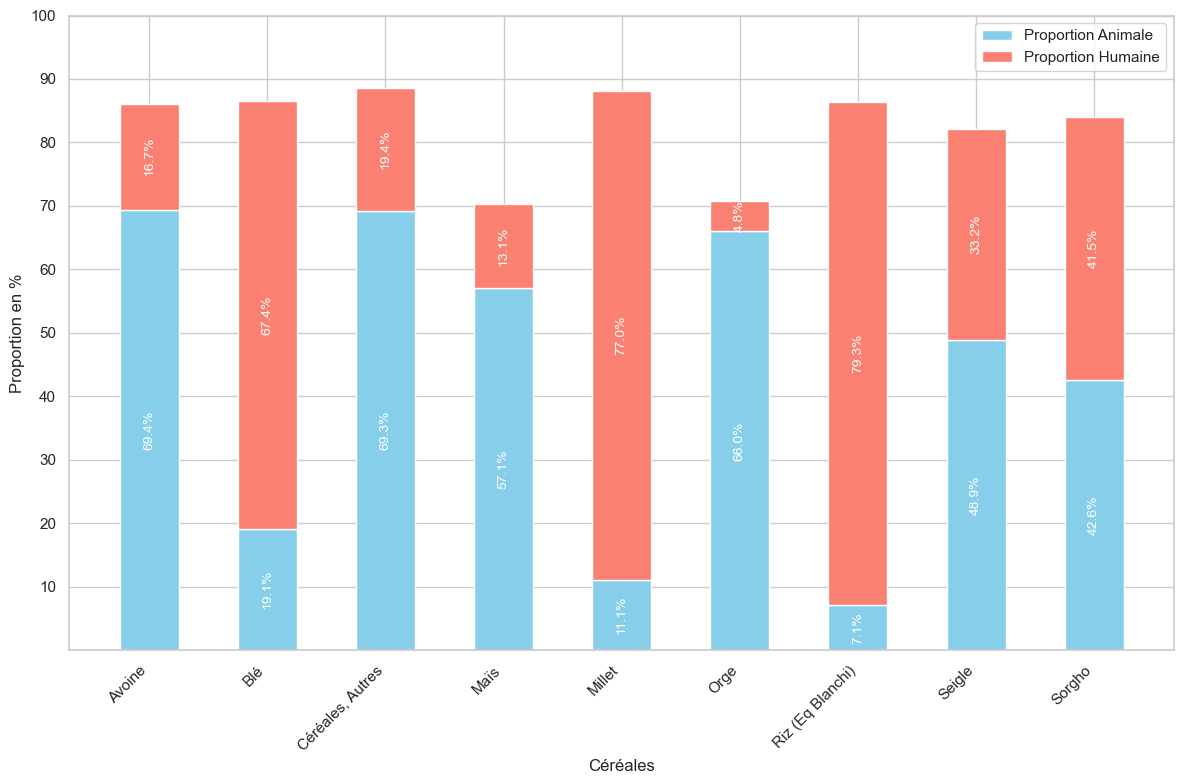

In [110]:
# Définir le style du graphique
sns.set(style='whitegrid')

# Définir la taille du graphique
plt.figure(figsize=(12, 8))

# Définir la largeur des barres
bar_width = 0.5
index = range(len(df_proportions))

# Tracer l'histogramme empilé
plt.bar(index, df_proportions['Proportion_Animale'], bar_width, label='Proportion Animale', color='skyblue')
plt.bar(index, df_proportions['Proportion_Humaine'], bar_width, bottom=df_proportions['Proportion_Animale'], label='Proportion Humaine', color='salmon')

# Ajouter les étiquettes en pourcentage au milieu des barres empilées
for i in range(len(df_proportions)):
    # Calculer la hauteur totale de chaque barre empilée
    height = df_proportions['Proportion_Animale'][i] + df_proportions['Proportion_Humaine'][i]
    
    # Calculer la hauteur à laquelle placer l'étiquette
    label_height = df_proportions['Proportion_Animale'][i] + df_proportions['Proportion_Humaine'][i] / 2
    
    # Ajouter les annotations pour les pourcentages
    plt.text(
        i,  # Position X
        label_height,  # Position Y
        f'{df_proportions["Proportion_Humaine"][i]:.1f}%',  # Texte de l'étiquette pour la proportion humaine
        ha='center',  # Alignement horizontal
        va='center',  # Alignement vertical
        fontsize=10,
        color='white',
        rotation=90  # Rotation du texte pour le rendre vertical
    )

    # Étiquettes pour la proportion animale
    plt.text(
        i,  # Position X
        df_proportions['Proportion_Animale'][i] / 2,  # Position Y
        f'{df_proportions["Proportion_Animale"][i]:.1f}%',  # Texte de l'étiquette pour la proportion animale
        ha='center',  # Alignement horizontal
        va='center',  # Alignement vertical
        fontsize=10,
        color='white',
        rotation=90  # Rotation du texte pour le rendre vertical
    )

# Ajouter des étiquettes et un titre
plt.xlabel('Céréales')
plt.ylabel('Proportion en %')
plt.xticks(index, df_proportions['Produit'], rotation=45, ha='right')

# Configurer les ticks de l'axe y 
plt.yticks(ticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Ajouter une légende
plt.legend()

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\dispo_animale_humain.png')

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [112]:
#Création de la colonne proportion par pays
df_sous_nutrition_2017 ['Proportion_%'] = (df_sous_nutrition_2017 ['sous_nutrition'] / df_sous_nutrition_2017 ['Population'] * 100).round(2)

In [113]:
#affichage après trie des 10 pires pays
# Trier les pays par la proportion de sous-nutrition en ordre décroissant
tri_Proportion_pourcentages = df_sous_nutrition_2017.sort_values(by='Proportion_%', ascending=False)

# Affichage des 10 pires pays avec sélection des colonnes
tri_Proportion_pourcentages[['Zone', 'sous_nutrition','Proportion_%']].head(10)

,Zone,sous_nutrition,Proportion_%
78,Haïti,5300000.0,48.26
157,République populaire démocratique de Corée,12000000.0,47.19
108,Madagascar,10500000.0,41.06
103,Libéria,1800000.0,38.28
100,Lesotho,800000.0,38.25
183,Tchad,5700000.0,37.96
161,Rwanda,4200000.0,35.06
121,Mozambique,9400000.0,32.81
186,Timor-Leste,400000.0,32.17
0,Afghanistan,10500000.0,28.93


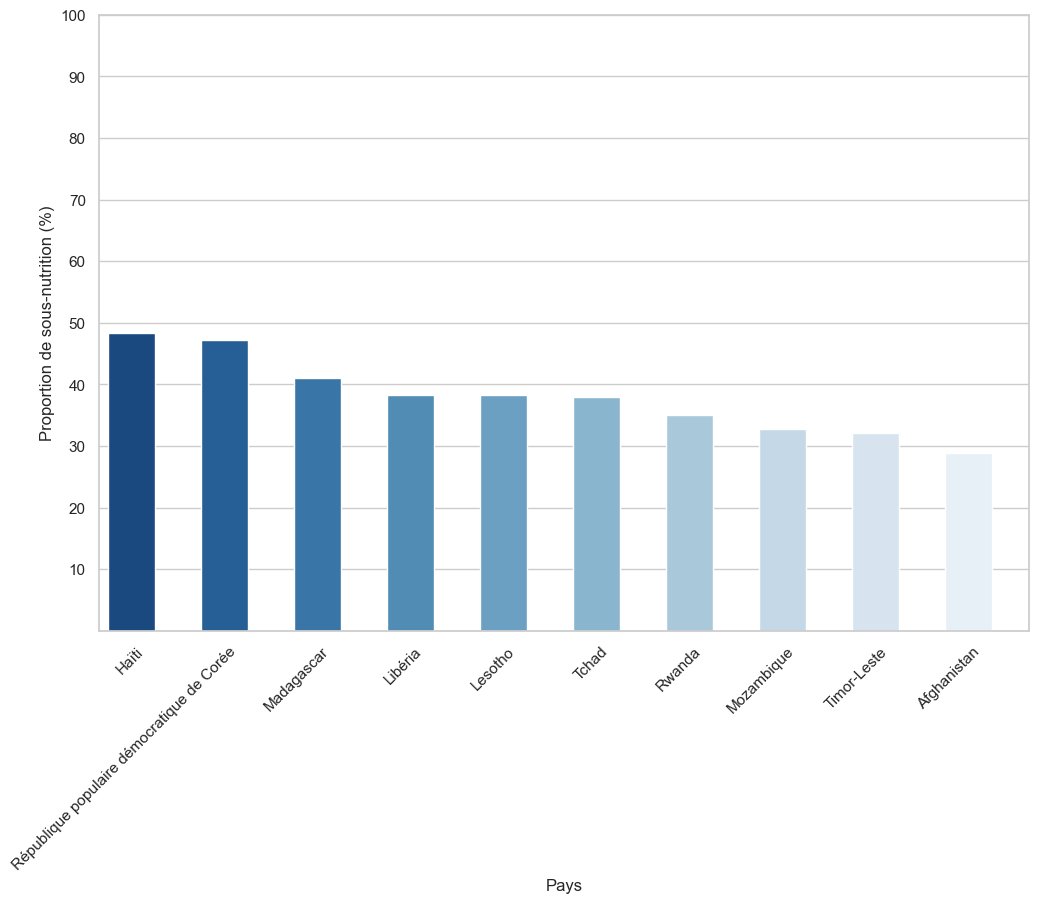

In [114]:
#Graphique

df_graphique = tri_Proportion_pourcentages[['Zone', 'Proportion_%']].head(10)

# Créer une palette de bleu
palette = sns.color_palette('Blues_r', len(df_graphique))

# Tracer le graphique
plt.figure(figsize=(12, 8))

# Définir le thème du graphique
sns.set_theme(style='whitegrid')

# Tracer les barres avec la palette de couleurs
ax = sns.barplot(data=df_graphique, x='Zone', y='Proportion_%', palette=palette)

# Ajuster la largeur des barres
bar_width = 0.5  # Largeur désirée des barres, ajustez selon vos besoins
for patch in ax.patches:
    patch.set_width(bar_width)

# Ajouter un titre et des labels
# plt.title("10 pays avec la plus forte sous-nutrition en 2017") - Titre si nécessaire
plt.xlabel("Pays")
plt.ylabel("Proportion de sous-nutrition (%)")

# Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Configurer les ticks de l'axe y 
plt.yticks(ticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_pays_sous_nutrition_.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [116]:
#calcul du total de l'aide alimentaire par pays

#On peut remarquer grâce au code ci-dessous que le df_aide_alimentaire indique des années de 2013 et plus
#df_aide_alimentaire.sort_values(by='Année')
#donc, il n'est pas nécessaire d'effectuer un filtre

#calcul du total de l'aide alimentaire par pays en kg
calcul_total_aide_par_pays = df_aide_alimentaire.groupby('Zone') ['Valeur'].sum().reset_index() #regroupement sur la colonne Zone et somme de la colonne Valeur

#calcul du total de l'aide alimentaire par pays en tonnes
calcul_total_aide_par_pays['Valeur']=calcul_total_aide_par_pays['Valeur'] / 1000

In [117]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
# Trier les pays par le total_aide_par_pays en ordre décroissant
total_aide_par_pays_sorted = calcul_total_aide_par_pays.sort_values(by='Valeur',ascending=False)

# Sélectionnier les 10 premiers
top_10_pays_aide = total_aide_par_pays_sorted.head(10)

# Afficher le résultat
print ("10 pays qui ont bénéficié le plus de l'aide alimentaire depuis 2013")
print(top_10_pays_aide)

10 pays qui ont bénéficié le plus de l'aide alimentaire depuis 2013
                                Zone     Valeur
50         République arabe syrienne  1858943.0
75                          Éthiopie  1381294.0
70                             Yémen  1206484.0
61                     Soudan du Sud   695248.0
60                            Soudan   669784.0
30                             Kenya   552836.0
3                         Bangladesh   348188.0
59                           Somalie   292678.0
53  République démocratique du Congo   288502.0
43                             Niger   276344.0


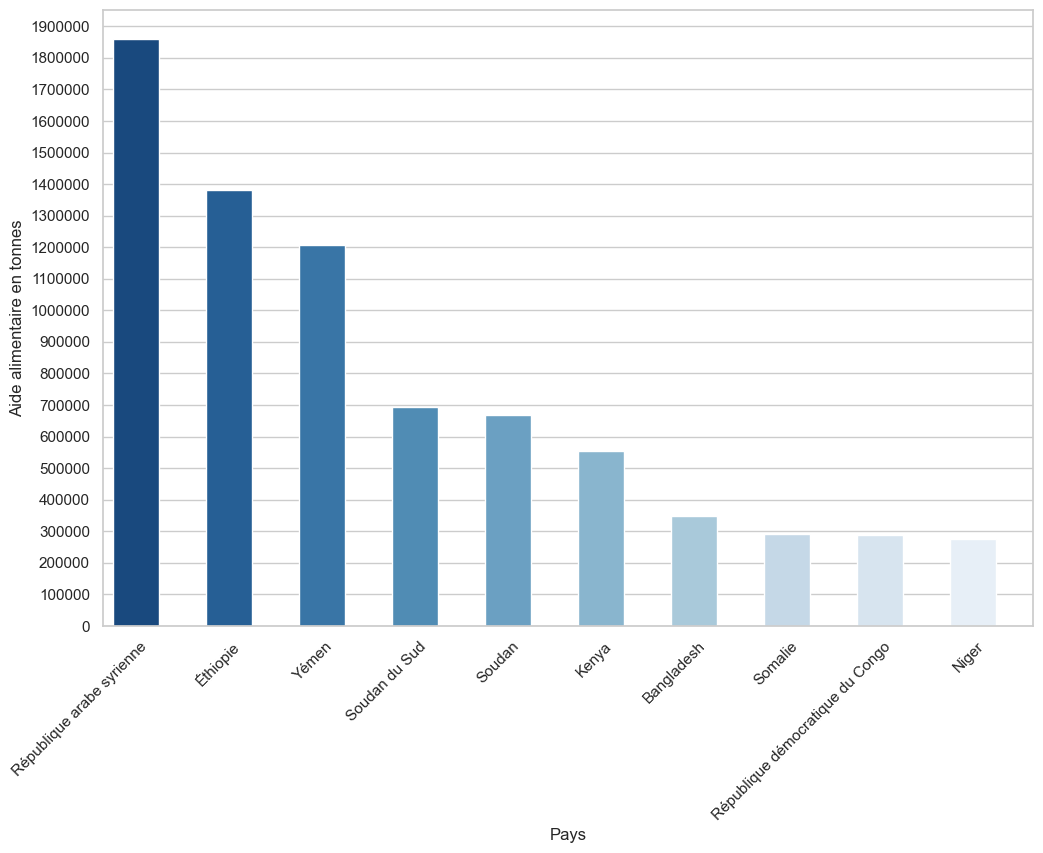

In [118]:
#Graphique

df_graphique = top_10_pays_aide.head(10)

# Créer une palette de bleu
palette = sns.color_palette('Blues_r', len(df_graphique))

# Tracer le graphique
plt.figure(figsize=(12, 8))

# Définir le thème du graphique
sns.set_theme(style='whitegrid')

# Tracer les barres avec la palette de couleurs
ax = sns.barplot(data=df_graphique, x='Zone', y='Valeur', palette=palette)

# Ajuster la largeur des barres
bar_width = 0.5  # Largeur désirée des barres, ajustez selon vos besoins
for patch in ax.patches:
    patch.set_width(bar_width)

# Ajouter un titre et des labels
plt.xlabel("Pays")
plt.ylabel("Aide alimentaire en tonnes")

# Configurer les ticks de l'axe y avec des labels plus lisibles
max_value = df_graphique['Valeur'].max()
plt.yticks(
    ticks=range(0, int(max_value) + 100_000, 100_000),  # Espacement des ticks
    labels=[f"{x:.0f}" for x in range(0, int(max_value) + 100_000, 100_000)]  # Format sans unité
)
# Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_aide_alim_pays_depuis_2013.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [120]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
df_aide_alimentaire_selection = df_aide_alimentaire [['Zone', 'Année', 'Valeur']]

# Groupement par 'Zone' et 'Année' et somme des aides alimentaires
df_aide_alimentaire_evolution = df_aide_alimentaire_selection.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

df_aide_alimentaire_evolution

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [121]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
#Calculer le total de l'aide alimentaire par pays en kg
total_aide_par_pays = df_aide_alimentaire_evolution.groupby('Zone')['Valeur'].sum()

#calcul du total de l'aide alimentaire par pays en tonnes
total_aide_par_pays=total_aide_par_pays / 1000

#Trier les pays par l'aide totale reçue, en ordre décroissant
total_aide_par_pays_sorted = total_aide_par_pays.sort_values(ascending=False)

#Sélectionner les 5 premiers pays
top_5_pays = total_aide_par_pays_sorted.head(5)

#Extraire les noms des pays sous forme de liste
top_5_pays_list = top_5_pays.index.tolist()

# Afficher la liste des 5 pays
print(top_5_pays_list)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [122]:
#On filtre sur le dataframe avec notre liste
df_aide_alimentaire_evolution_top_5 = df_aide_alimentaire_evolution [df_aide_alimentaire_evolution['Zone'].isin(top_5_pays_list)]

# Convertir les valeurs en tonnes
df_aide_alimentaire_evolution_top_5.loc[:, 'Valeur'] = df_aide_alimentaire_evolution_top_5['Valeur'] / 1000

In [123]:
# Affichage des pays avec l'aide alimentaire par année
print(df_aide_alimentaire_evolution_top_5)

                          Zone  Année  Valeur
157  République arabe syrienne   2013  563566
158  République arabe syrienne   2014  651870
159  République arabe syrienne   2015  524949
160  République arabe syrienne   2016  118558
189                     Soudan   2013  330230
190                     Soudan   2014  321904
191                     Soudan   2015   17650
192              Soudan du Sud   2013  196330
193              Soudan du Sud   2014  450610
194              Soudan du Sud   2015   48308
214                      Yémen   2013  264764
215                      Yémen   2014  103840
216                      Yémen   2015  372306
217                      Yémen   2016  465574
225                   Éthiopie   2013  591404
226                   Éthiopie   2014  586624
227                   Éthiopie   2015  203266


C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


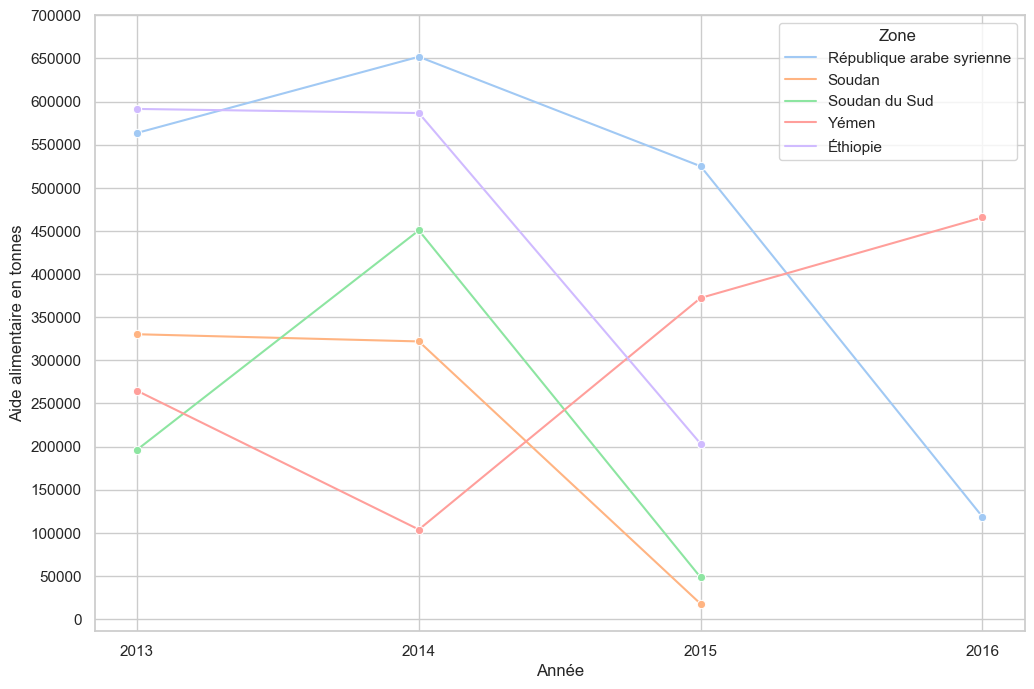

In [124]:
#Graphique

# Remplacer les valeurs infinies par NaN dans le DataFrame de manière sécurisée
df_aide_alimentaire_evolution_top_5.loc[:, :] = df_aide_alimentaire_evolution_top_5.replace([np.inf, -np.inf], np.nan)

# Définir le thème Seaborn
sns.set_theme(style='whitegrid', palette='pastel')

# Tracer le graphique
plt.figure(figsize=(12, 8))

# Créer le graphique de ligne avec Seaborn
sns.lineplot(
    data=df_aide_alimentaire_evolution_top_5, 
    x='Année', 
    y='Valeur', 
    hue='Zone', 
    marker='o'
)

# Ajouter un titre et des labels
plt.xlabel("Année")
plt.ylabel("Aide alimentaire en tonnes")

# Configurer les ticks de l'axe y avec des labels plus lisibles
max_value = df_aide_alimentaire_evolution_top_5['Valeur'].max()
plt.yticks(
    ticks=range(0, int(max_value) + 50_000, 50_000),  
    labels=[f"{x:.0f}" for x in range(0, int(max_value) + 50_000, 50_000)]  
)
    
# Configurer les ticks de l'axe x pour afficher uniquement les années sans décimales
plt.xticks(ticks=[2013, 2014, 2015, 2016])

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_evol_aide_alim_5_pays_depuis_2013.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [126]:
#Conversion de dispo_kcal/année en dispo_kcal/jour
df_dispo_alimentaire_2017 ['dispo_kcal'] = df_dispo_alimentaire_2017 ['dispo_kcal'] / 365

#Calcul de la disponibilité en kcal par personne par jour par pays
df_total_kcal = df_dispo_alimentaire_2017.groupby('Zone').agg({
    'dispo_kcal': 'sum',  # Total des kcal disponibles pour chaque pays
    'Population': 'first'  # La population est identique pour chaque produit dans un pays
}).reset_index()

# Calculer les kcal par personne pour chaque pays
df_total_kcal['kcal_par_personne'] = df_total_kcal['dispo_kcal'] / df_total_kcal['Population']

# Afficher le résultat
print("Disponibilité en kcal par personne par jour par pays")
print(df_total_kcal[['Zone', 'kcal_par_personne']])

Disponibilité en kcal par personne par jour par pays
                      Zone  kcal_par_personne
0              Afghanistan             2087.0
1           Afrique du Sud             3020.0
2                  Albanie             3188.0
3                  Algérie             3293.0
4                Allemagne             3503.0
..                     ...                ...
169    Émirats arabes unis             3275.0
170               Équateur             2346.0
171  États-Unis d'Amérique             3682.0
172               Éthiopie             2129.0
173           Îles Salomon             2383.0

[174 rows x 2 columns]


In [127]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
df_total_kcal_sorted = df_total_kcal.sort_values(by='kcal_par_personne').head(10)
print("Les 10 pays avec le moins de disponibilité alimentaire par personne:")
print(df_total_kcal_sorted[['Zone', 'kcal_par_personne']])

Les 10 pays avec le moins de disponibilité alimentaire par personne:
                                           Zone  kcal_par_personne
128                   République centrafricaine             1879.0
166                                      Zambie             1924.0
91                                   Madagascar             2056.0
0                                   Afghanistan             2087.0
65                                        Haïti             2089.0
133  République populaire démocratique de Corée             2093.0
151                                       Tchad             2109.0
167                                    Zimbabwe             2113.0
114                                     Ouganda             2126.0
154                                 Timor-Leste             2129.0


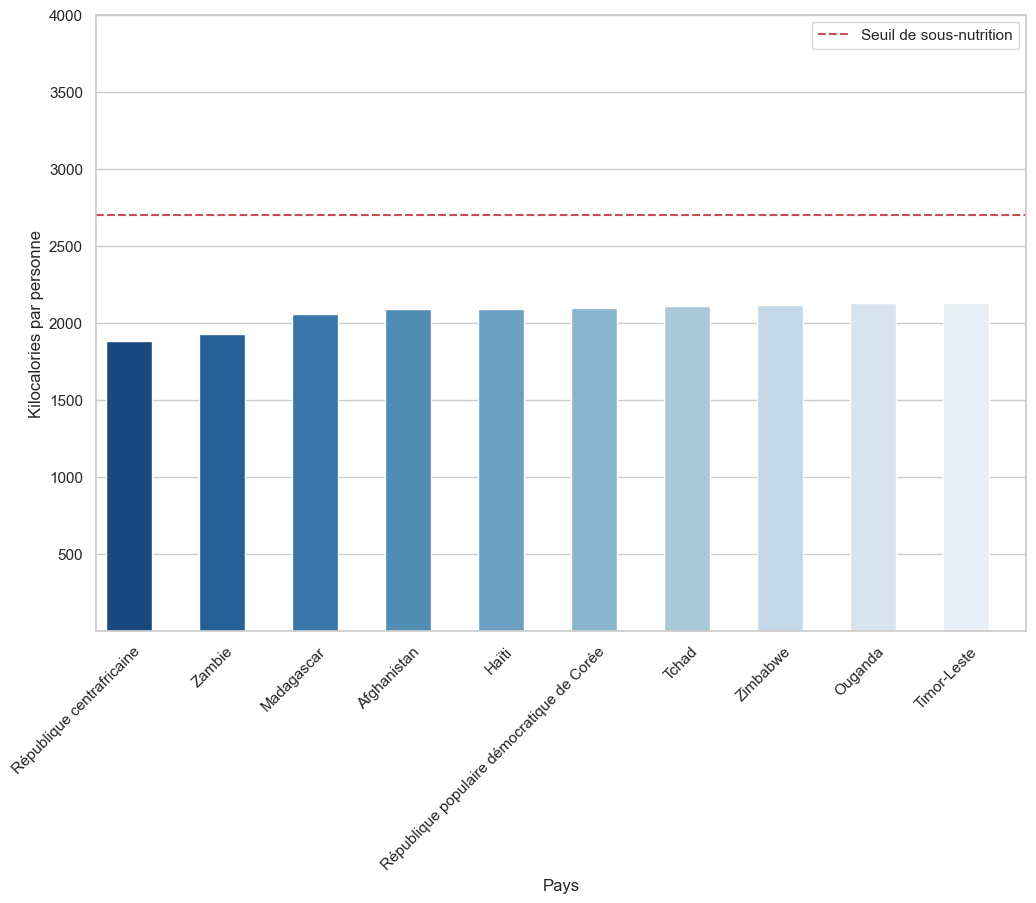

In [128]:
#Graphique
df_graphique = df_total_kcal_sorted[['Zone', 'kcal_par_personne']].head(10)

# Créer une palette de bleu
palette = sns.color_palette('Blues_r', len(df_graphique))

# Tracer le graphique
plt.figure(figsize=(12, 8))
#sns.set_palette('Set2')
sns.set_theme(style='whitegrid')

# Tracer les barres avec la palette de couleurs
ax = sns.barplot(data=df_graphique, x='Zone', y='kcal_par_personne', palette=palette)

# Définition de la constante du seuil de calories sous-nutrition
plt.axhline(2700, color="r", linestyle="--", label="Seuil de sous-nutrition")

# Ajuster la largeur des barres
bar_width = 0.5  # Largeur désirée des barres, ajustez selon vos besoins
for patch in ax.patches:
    patch.set_width(bar_width)

# Ajouter un titre et des labels
# plt.title("10 pays avec le moins de dispo alimentaire par personne") - Titre si nécessaire
plt.xlabel("Pays")
plt.ylabel("Kilocalories par personne")

# Configurer les ticks de l'axe y 
plt.yticks(ticks=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

# Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage de la légende
plt.legend()

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_pays_moins_dispo_alim.png')


# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [130]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
df_total_kcal_sorted = df_total_kcal.sort_values(by='kcal_par_personne',ascending=False).head(10)
print("Les 10 pays avec le plus de disponibilité alimentaire par personne:")
print(df_total_kcal_sorted[['Zone', 'kcal_par_personne']])

Les 10 pays avec le plus de disponibilité alimentaire par personne:
                      Zone  kcal_par_personne
11                Autriche             3770.0
16                Belgique             3737.0
159                Turquie             3708.0
171  États-Unis d'Amérique             3682.0
74                  Israël             3610.0
72                 Irlande             3602.0
75                  Italie             3578.0
89              Luxembourg             3540.0
168                 Égypte             3518.0
4                Allemagne             3503.0


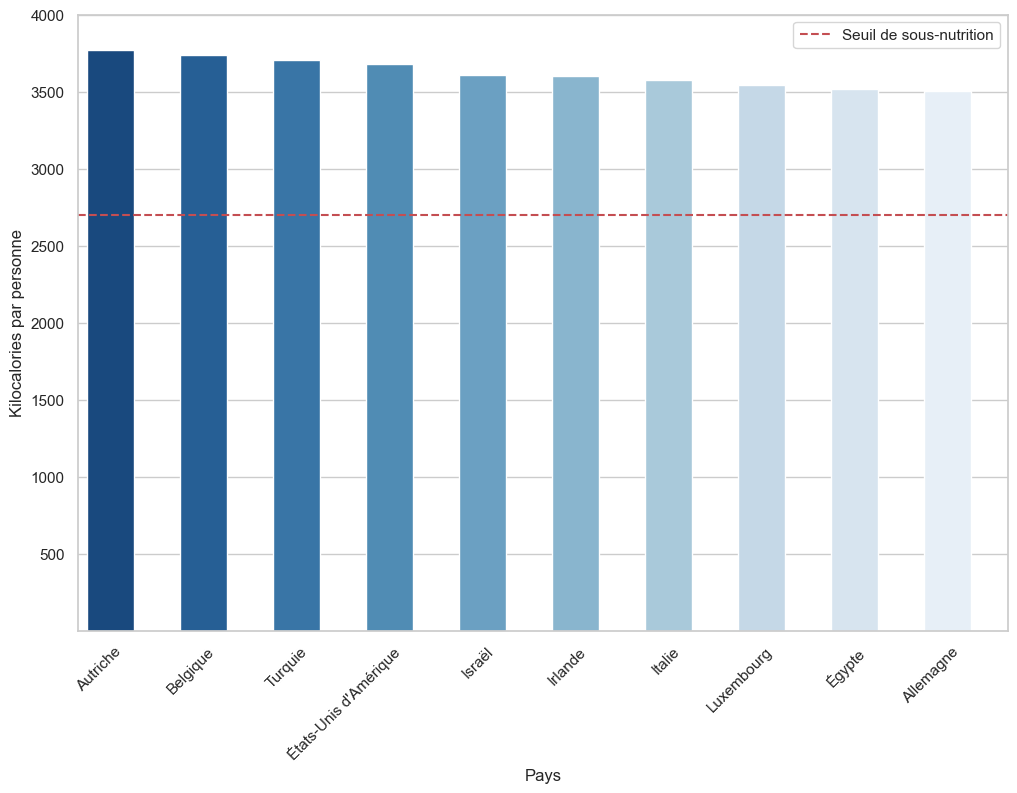

In [131]:
#Graphique
df_graphique = df_total_kcal_sorted[['Zone', 'kcal_par_personne']].head(10)

# Créer une palette de bleu
palette = sns.color_palette('Blues_r', len(df_graphique))

# Tracer le graphique
plt.figure(figsize=(12, 8))
#sns.set_palette('Set2')
sns.set_theme(style='whitegrid')

# Tracer les barres avec la palette de couleurs
ax = sns.barplot(data=df_graphique, x='Zone', y='kcal_par_personne', palette=palette)

# Définition de la constante du seuil de calories sous-nutrition
plt.axhline(2700, color="r", linestyle="--", label="Seuil de sous-nutrition")

# Ajuster la largeur des barres
bar_width = 0.5  # Largeur désirée des barres, ajustez selon vos besoins
for patch in ax.patches:
    patch.set_width(bar_width)
    
# Ajouter un titre et des labels
# plt.title("10 pays avec le plus de dispo alimentaire par personne") - Titre si nécessaire
plt.xlabel("Pays")
plt.ylabel("Kilocalories par personne")

# Configurer les ticks de l'axe y 
plt.yticks(ticks=[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

# Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage de la légende
plt.legend()

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_pays_plus_dispo_alim.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [133]:
#création d'un dataframe avec uniquement la Thaïlande 
df_dispo_alimentaire_2017_Thailande = df_dispo_alimentaire_2017[(df_dispo_alimentaire_2017['Zone'] == 'Thaïlande') & (df_dispo_alimentaire_2017['Produit'] == 'Manioc')]
df_dispo_alimentaire_2017_Thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,69209810.0,2.768392e+09


In [134]:
#Calcul de la sous nutrition en Thaïlande
# Filtrer le df_sous_nutrition_2017 pour la Thaïlande
df_sous_nutrition_2017_Thailande = df_sous_nutrition_2017[df_sous_nutrition_2017['Zone'] == 'Thaïlande']

# Afficher le résultat
print("Proportion de sous-nutrition en Thaïlande : {:.2f}%".format(df_sous_nutrition_2017_Thailande['Proportion_%'].values[0]))

Proportion de sous-nutrition en Thaïlande : 8.96%


In [135]:
# On calcule la proportion exportée en fonction de la production
calcul_proportion_exportations = df_dispo_alimentaire_2017_Thailande['Exportations - Quantité'] / df_dispo_alimentaire_2017_Thailande['Production'] * 100

#A Afficher le résultat
print("La proportion des exportations du manioc par rapport à la production est de : {:.2f}%".format(calcul_proportion_exportations.values[0]))

La proportion des exportations du manioc par rapport à la production est de : 83.41%


In [136]:
# Calculer les kcal disponibles par jour par personne pour la Thaïlande
df_total_kcal_Thailande = df_total_kcal[df_total_kcal['Zone'] == 'Thaïlande']

# Afficher les résultats pour vérifier
print(df_total_kcal_Thailande[['Zone', 'kcal_par_personne']])

          Zone  kcal_par_personne
153  Thaïlande             2785.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [138]:
#Rajouter en dessous toutes les analyses complémentaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.1 - Répartition de l'utilisation du manioc en Thaïlande</h3>
</div>

In [140]:
# Répartition de l'utilisation du manioc
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
columns = ['Pertes','Nourriture','Aliments pour animaux','Autres Utilisations']

# Création d'une liste pour stocker les résultats
results = []
for column in columns:
    valeur_tonnes = df_dispo_alimentaire_2017_Thailande[column].sum() / 1_000
    valeur_pourcentage = (((valeur_tonnes * 1_000) / df_dispo_alimentaire_2017_Thailande['Disponibilité intérieure'].sum())* 100).round(2)

    # Ajouter les résultats à la liste
    results.append({
        'Utilisation': column,
        'Valeur': valeur_tonnes,
        'Pourcentage (%)': valeur_pourcentage
    })
# Créer le DataFrame à partir des résultats
df_resultat = pd.DataFrame(results)

# Afficher le DataFrame
print(df_resultat)

             Utilisation     Valeur  Pourcentage (%)
0                 Pertes  1511000.0            24.12
1             Nourriture   871000.0            13.90
2  Aliments pour animaux  1800000.0            28.74
3    Autres Utilisations  2081000.0            33.22


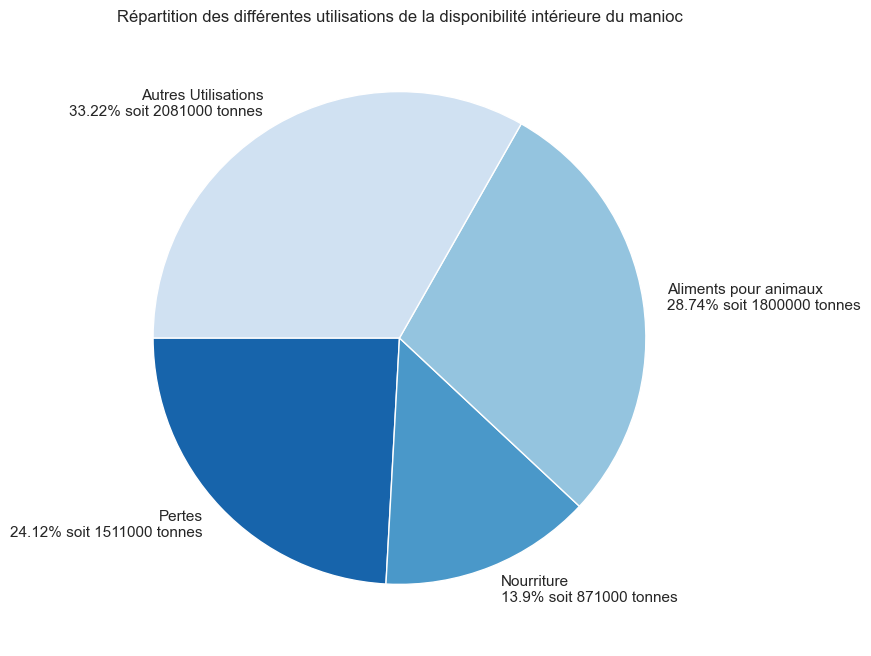

In [141]:
#Graphique
# Création du pie chart
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid', palette='pastel')

# Extraire les valeurs et labels
valeurs = df_resultat['Valeur']
labels = df_resultat['Utilisation']
pourcentages = df_resultat['Pourcentage (%)']

# Création des étiquettes avec pourcentages et tonnes
etiquettes = [f'{u}\n{p}% soit {v:.0f} tonnes' for u, p, v in zip(labels, pourcentages, valeurs)]

# Création du pie chart avec les étiquettes personnalisées
plt.pie(valeurs, labels=etiquettes, startangle=180, colors=sns.color_palette('Blues_r', len(labels)))

# Ajouter un titre
plt.title("Répartition des différentes utilisations de la disponibilité intérieure du manioc")

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_utilisations_manioc_Thailande.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Evolution de la proportion de sous-nutrition en Thaïlande entre 2013 et 2018</h3>
</div>

In [143]:
# Sous-nutrition Thaïlande
df_sous_nutrition_Thailande = df_sous_nutrition[df_sous_nutrition['Zone'] == 'Thaïlande']
df_sous_nutrition_Thailande

,Zone,Année,sous_nutrition
1110,Thaïlande,2012-2014,6200000.0
1111,Thaïlande,2013-2015,6000000.0
1112,Thaïlande,2014-2016,5900000.0
1113,Thaïlande,2015-2017,6000000.0
1114,Thaïlande,2016-2018,6200000.0
1115,Thaïlande,2017-2019,6500000.0


In [144]:
# Conversion de la colonne 'Année' en chaîne de caractères en utilisant .loc
df_sous_nutrition_Thailande.loc[:, 'Année'] = df_sous_nutrition_Thailande['Année'].astype(str)

# Fonction pour remplacer la valeur de la colonne 'Année'
def remplacer_annee(annee_range):
    if '-' in annee_range:
        start_year, end_year = map(int, annee_range.split('-'))
        return (start_year + end_year) // 2
    else:
        # Retourner la valeur inchangée si le format est incorrect
        return annee_range

# Application de la fonction 'remplacer_annee' sur la colonne 'Année'
df_sous_nutrition_Thailande.loc[:, 'Année'] = df_sous_nutrition_Thailande['Année'].apply(remplacer_annee)

# Afficher le DataFrame modifié
print(df_sous_nutrition_Thailande)

           Zone Année  sous_nutrition
1110  Thaïlande  2013       6200000.0
1111  Thaïlande  2014       6000000.0
1112  Thaïlande  2015       5900000.0
1113  Thaïlande  2016       6000000.0
1114  Thaïlande  2017       6200000.0
1115  Thaïlande  2018       6500000.0


In [145]:
# Jointure sous-nutrition Thaïlande et population Thaïlande pour chaque Année
df_population_Thailande = df_population[(df_population['Zone'] == 'Thaïlande')]
df_sous_nutrition_Thailande = pd.merge(df_sous_nutrition_Thailande,df_population_Thailande,on='Année',how='inner')
df_sous_nutrition_Thailande

,Zone_x,Année,sous_nutrition,Zone_y,Population
0,Thaïlande,2013,6200000.0,Thaïlande,68144518.0
1,Thaïlande,2014,6000000.0,Thaïlande,68438746.0
2,Thaïlande,2015,5900000.0,Thaïlande,68714511.0
3,Thaïlande,2016,6000000.0,Thaïlande,68971308.0
4,Thaïlande,2017,6200000.0,Thaïlande,69209810.0
5,Thaïlande,2018,6500000.0,Thaïlande,69428453.0


In [146]:
# Calcul des proportions de sous-nutrition en Thaïlande par année
df_sous_nutrition_Thailande ['Proportion_%'] = (df_sous_nutrition_Thailande ['sous_nutrition'] / df_sous_nutrition_Thailande ['Population'] * 100).round(2)
df_sous_nutrition_Thailande [['Année', 'Proportion_%']]

,Année,Proportion_%
0,2013,9.10
1,2014,8.77
2,2015,8.59
3,2016,8.70
4,2017,8.96
5,2018,9.36


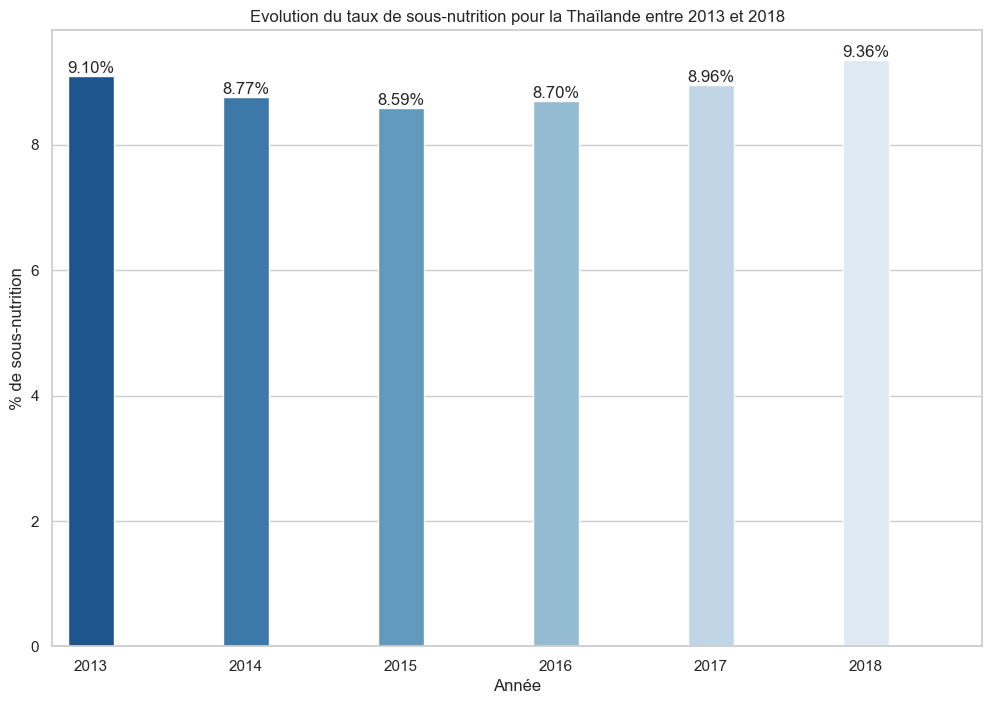

In [147]:
# Graphique
df_graphique = df_sous_nutrition_Thailande[['Année', 'Proportion_%']]

# Créer une palette de bleu
palette = sns.color_palette('Blues_r', len(df_graphique))

# Tracer le graphique
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')

# Tracer les barres avec la palette de couleurs
ax = sns.barplot(data=df_graphique, x='Année', y='Proportion_%', palette=palette)

# Ajuster la largeur des barres
bar_width = 0.3  # Largeur désirée des barres, ajustez selon vos besoins
for patch in ax.patches:
    patch.set_width(bar_width)

# Recentrer les étiquettes des années sous les barres
new_positions = [patch.get_x() + patch.get_width() / 2 for patch in ax.patches]
ax.set_xticks(new_positions)

# Réappliquer les labels des années
ax.set_xticklabels(df_graphique['Année'])

# Ajouter les étiquettes de pourcentage au-dessus des barres
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

# Ajouter un label à l'axe des y
plt.ylabel("% de sous-nutrition")

# Ajouter un titre
plt.title("Evolution du taux de sous-nutrition pour la Thaïlande entre 2013 et 2018")

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_evol_sous_nutrition_Thailande.png')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.2 - Evolution de la proportion de sous-nutrition pour les 5 pays qui ont le plus bénéficié de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [149]:
#Création d'un dataframe avec la zone, l'année et la sous-nutrition pour les 5 pays qui ont le plus bénéficié de l'aide alimentaire
df_sous_nutrition_top_5_aide_alimentaire = df_sous_nutrition[df_sous_nutrition['Zone'].isin(top_5_pays_list)]
df_sous_nutrition_top_5_aide_alimentaire

,Zone,Année,sous_nutrition
366,Éthiopie,2012-2014,26200000.0
367,Éthiopie,2013-2015,24300000.0
368,Éthiopie,2014-2016,21700000.0
369,Éthiopie,2015-2017,21300000.0
370,Éthiopie,2016-2018,21100000.0
371,Éthiopie,2017-2019,21500000.0
900,République arabe syrienne,2012-2014,0.0
901,République arabe syrienne,2013-2015,0.0
902,République arabe syrienne,2014-2016,0.0
903,République arabe syrienne,2015-2017,0.0


In [150]:
# Conversion de la colonne 'Année' en chaîne de caractères en utilisant .loc
df_sous_nutrition_top_5_aide_alimentaire.loc[:, 'Année'] = df_sous_nutrition_top_5_aide_alimentaire['Année'].astype(str)

# Fonction pour remplacer la valeur de la colonne 'Année'
def remplacer_annee(annee_range):
    if '-' in annee_range:
        start_year, end_year = map(int, annee_range.split('-'))
        return (start_year + end_year) // 2
    else:
        # Retourner la valeur inchangée si le format est incorrect
        return annee_range

# Application de la fonction 'remplacer_annee' sur la colonne 'Année'
df_sous_nutrition_top_5_aide_alimentaire.loc[:, 'Année'] = df_sous_nutrition_top_5_aide_alimentaire['Année'].apply(remplacer_annee)

# Afficher le DataFrame modifié
df_sous_nutrition_top_5_aide_alimentaire

,Zone,Année,sous_nutrition
366,Éthiopie,2013,26200000.0
367,Éthiopie,2014,24300000.0
368,Éthiopie,2015,21700000.0
369,Éthiopie,2016,21300000.0
370,Éthiopie,2017,21100000.0
371,Éthiopie,2018,21500000.0
900,République arabe syrienne,2013,0.0
901,République arabe syrienne,2014,0.0
902,République arabe syrienne,2015,0.0
903,République arabe syrienne,2016,0.0


In [151]:
# Jointure sous-nutrition top 5 pays aide_alimentaire et population top 5 pays aide_alimentaire pour chaque Année
df_population_top_5_aide_alimentaire = df_population[df_population['Zone'].isin(top_5_pays_list)]
df_sous_nutrition_top_5_aide_alimentaire = pd.merge(df_sous_nutrition_top_5_aide_alimentaire,df_population_top_5_aide_alimentaire,on=['Zone','Année'],how='left')
df_sous_nutrition_top_5_aide_alimentaire

,Zone,Année,sous_nutrition,Population
0,Éthiopie,2013,26200000.0,95385798.0
1,Éthiopie,2014,24300000.0,98094265.0
2,Éthiopie,2015,21700000.0,100835458.0
3,Éthiopie,2016,21300000.0,103603462.0
4,Éthiopie,2017,21100000.0,106399924.0
5,Éthiopie,2018,21500000.0,109224414.0
6,République arabe syrienne,2013,0.0,19578461.0
7,République arabe syrienne,2014,0.0,18710711.0
8,République arabe syrienne,2015,0.0,17997408.0
9,République arabe syrienne,2016,0.0,17465575.0


In [152]:
# Calcul des proportions de sous-nutrition top 5 aide alimentaire par année
df_sous_nutrition_top_5_aide_alimentaire ['Proportion_%'] = (df_sous_nutrition_top_5_aide_alimentaire ['sous_nutrition'] / df_sous_nutrition_top_5_aide_alimentaire ['Population'] * 100).round(2)
df_sous_nutrition_top_5_aide_alimentaire = df_sous_nutrition_top_5_aide_alimentaire [df_sous_nutrition_top_5_aide_alimentaire['Année'] < 2017]
df_sous_nutrition_top_5_aide_alimentaire

,Zone,Année,sous_nutrition,Population,Proportion_%
0,Éthiopie,2013,26200000.0,95385798.0,27.47
1,Éthiopie,2014,24300000.0,98094265.0,24.77
2,Éthiopie,2015,21700000.0,100835458.0,21.52
3,Éthiopie,2016,21300000.0,103603462.0,20.56
6,République arabe syrienne,2013,0.0,19578461.0,0.00
7,République arabe syrienne,2014,0.0,18710711.0,0.00
8,République arabe syrienne,2015,0.0,17997408.0,0.00
9,République arabe syrienne,2016,0.0,17465575.0,0.00
12,Soudan,2013,5900000.0,37072550.0,15.91
13,Soudan,2014,5100000.0,37977655.0,13.43


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.3 - Taux moyen de sous-nutrition en 2017</h3>
</div>

In [154]:
# Sélection des pays ayant une proportion de sous-nutrition supérieur à zéro
df_sous_nutrition_2017_non_zero = df_sous_nutrition_2017[(df_sous_nutrition_2017['Proportion_%'] > 0)]

In [155]:
# Calcul du taux moyen de sous-nutrition pour 2017
calcul_taux_moyen_sous_nutrition_2017=(df_sous_nutrition_2017_non_zero['Proportion_%'].mean()).round(2)

#Affichage du résultat
print(f"Le taux moyen de sous-nutrition en 2017 est de {calcul_taux_moyen_sous_nutrition_2017:.2f} %")

Le taux moyen de sous-nutrition en 2017 est de 14.13 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.4 - Evolution des taux de sous-nutrition des 5 pays les plus sous-alimentés entre 2013 et 2016</h3>
</div>

In [157]:
#Création du dataframe et conversion des intervalles d'année en année

df_sous_nutrition_annee = df_sous_nutrition

# Conversion de la colonne 'Année' en chaîne de caractères en utilisant .loc
df_sous_nutrition_annee.loc[:, 'Année'] = df_sous_nutrition_annee['Année'].astype(str)

# Fonction pour remplacer la valeur de la colonne 'Année'
def remplacer_annee(annee_range):
    if '-' in annee_range:
        start_year, end_year = map(int, annee_range.split('-'))
        return (start_year + end_year) // 2
    else:
        # Retourner la valeur inchangée si le format est incorrect
        return annee_range

# Application de la fonction 'remplacer_annee' sur la colonne 'Année'
df_sous_nutrition_annee.loc[:, 'Année'] = df_sous_nutrition_annee['Année'].apply(remplacer_annee)

# Afficher le DataFrame modifié
df_sous_nutrition_annee

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


In [158]:
#Jointure avec le dataframe 'Population'
df_sous_nutrition_annee = pd.merge(df_sous_nutrition_annee,df_population,on=['Zone','Année'],how='left')
df_sous_nutrition_annee

,Zone,Année,sous_nutrition,Population
0,Afghanistan,2013,8600000.0,32269589.0
1,Afghanistan,2014,8800000.0,33370794.0
2,Afghanistan,2015,8900000.0,34413603.0
3,Afghanistan,2016,9700000.0,35383032.0
4,Afghanistan,2017,10500000.0,36296113.0
...,...,...,...,...
1213,Zimbabwe,2014,0.0,13586707.0
1214,Zimbabwe,2015,0.0,13814629.0
1215,Zimbabwe,2016,0.0,14030331.0
1216,Zimbabwe,2017,0.0,14236595.0


In [159]:
# Calcul des proportions de sous-nutrition par année
df_sous_nutrition_annee ['Proportion_%'] = (df_sous_nutrition_annee ['sous_nutrition'] / df_sous_nutrition_annee ['Population'] * 100).round(2)
# Sélection des pays dont la Proportion_% est supérieure à 0
df_sous_nutrition_annee_plus_que_0 = df_sous_nutrition_annee [(df_sous_nutrition_annee['Année'] < 2017) & (df_sous_nutrition_annee['Proportion_%'] > 0)]
df_sous_nutrition_annee_plus_que_0

,Zone,Année,sous_nutrition,Population,Proportion_%
0,Afghanistan,2013,8600000.0,32269589.0,26.65
1,Afghanistan,2014,8800000.0,33370794.0,26.37
2,Afghanistan,2015,8900000.0,34413603.0,25.86
3,Afghanistan,2016,9700000.0,35383032.0,27.41
6,Afrique du Sud,2013,2200000.0,53687121.0,4.10
...,...,...,...,...,...
1191,Venezuela (République bolivarienne du),2016,6200000.0,29851255.0,20.77
1194,Viet Nam,2013,8900000.0,90752592.0,9.81
1195,Viet Nam,2014,8300000.0,91713848.0,9.05
1196,Viet Nam,2015,7600000.0,92677076.0,8.20


In [160]:
# Sélection des pays dont la Proportion_% est égale à 0
calcul_sous_nutrition_annee_0 = df_sous_nutrition_annee[df_sous_nutrition_annee['Proportion_%'] == 0]
calcul_sous_nutrition_annee_0

,Zone,Année,sous_nutrition,Population,Proportion_%
24,Allemagne,2013,0.0,81174367.0,0.0
25,Allemagne,2014,0.0,81450378.0,0.0
26,Allemagne,2015,0.0,81787411.0,0.0
27,Allemagne,2016,0.0,82193768.0,0.0
28,Allemagne,2017,0.0,82658409.0,0.0
...,...,...,...,...,...
1213,Zimbabwe,2014,0.0,13586707.0,0.0
1214,Zimbabwe,2015,0.0,13814629.0,0.0
1215,Zimbabwe,2016,0.0,14030331.0,0.0
1216,Zimbabwe,2017,0.0,14236595.0,0.0


In [161]:
# Calculer la moyenne des proportions de sous-nutrition pour chaque pays sur les années 2013 à 2016
moyenne_sous_nutrition_par_pays = df_sous_nutrition_annee_plus_que_0.groupby('Zone')['Proportion_%'].mean().round(2).reset_index()

# Trier les pays par leur moyenne décroissante et sélectionner les 5 premiers
top_5_pays_moyenne_sous_nutrition = moyenne_sous_nutrition_par_pays.sort_values(by='Proportion_%', ascending=False).head(5)

# Extraire les noms des 5 pays sous forme de liste
top_5_pays_moyenne_sous_nutrition_list = top_5_pays_moyenne_sous_nutrition['Zone'].tolist()

# Afficher la liste des 5 pays
print(top_5_pays_moyenne_sous_nutrition_list)

['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Libéria', 'Tchad']


In [162]:
#Evolution des taux de sous-nutrition entre 2013 et 2016 pour les 5 pays dont la moyenne sous-nutrition 2013 à 2016 
#est la plus élevée
top_5_pays_sous_nutrition_evolution = df_sous_nutrition_annee_plus_que_0[df_sous_nutrition_annee_plus_que_0['Zone'].isin(top_5_pays_moyenne_sous_nutrition_list)]
top_5_pays_sous_nutrition_evolution

,Zone,Année,sous_nutrition,Population,Proportion_%
468,Haïti,2013,5100000.0,10400675.0,49.04
469,Haïti,2014,5100000.0,10549009.0,48.35
470,Haïti,2015,5100000.0,10695542.0,47.68
471,Haïti,2016,5200000.0,10839970.0,47.97
618,Libéria,2013,1500000.0,4248334.0,35.31
619,Libéria,2014,1600000.0,4359506.0,36.70
620,Libéria,2015,1700000.0,4472230.0,38.01
621,Libéria,2016,1800000.0,4586787.0,39.24
648,Madagascar,2013,7600000.0,22961255.0,33.10
649,Madagascar,2014,8700000.0,23589888.0,36.88


C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


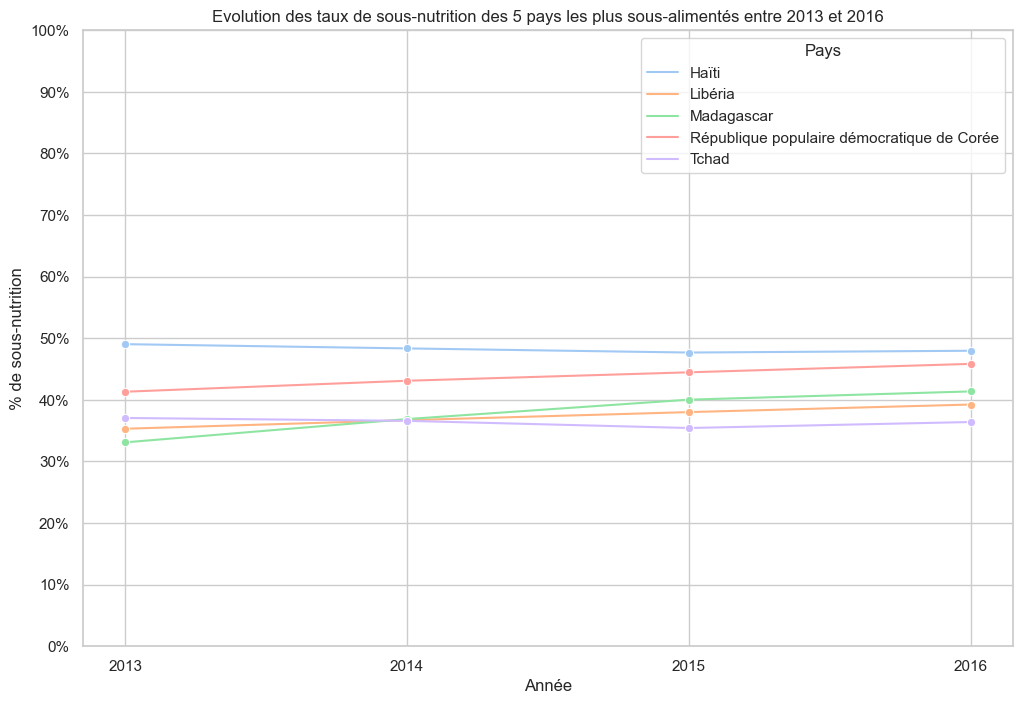

In [163]:
#Graphique

# Remplacer les valeurs infinies par NaN dans le DataFrame de manière sécurisée
#df_aide_alimentaire_evolution_top_5.loc[:, :] = df_aide_alimentaire_evolution_top_5.replace([np.inf, -np.inf], np.nan)

# Définir le thème Seaborn
sns.set_theme(style='whitegrid', palette='pastel')

# Tracer le graphique
plt.figure(figsize=(12, 8))

# Créer le graphique de ligne avec Seaborn
sns.lineplot(
    data=top_5_pays_sous_nutrition_evolution, 
    x='Année', 
    y='Proportion_%', 
    hue='Zone', 
    marker='o'
)

# Ajouter un titre et des labels
plt.xlabel("Année")
plt.ylabel("% de sous-nutrition")

# Configurer l'échelle de l'axe des y pour aller de 0 à 100%
plt.ylim(0, 100)

# Configurer les ticks de l'axe y pour afficher les pourcentages
plt.yticks(ticks=range(0, 101, 10), labels=[f"{x}%" for x in range(0, 101, 10)])

# Configurer les ticks de l'axe x pour afficher uniquement les années sans décimales
plt.xticks(ticks=[2013, 2014, 2015, 2016])

# Positionner la légende en haut à droite à l'intérieur du graphique
plt.legend(title='Pays', loc='upper right')

# Ajouter un titre
plt.title("Evolution des taux de sous-nutrition des 5 pays les plus sous-alimentés entre 2013 et 2016")

# Sauvegarder le graphique au format *.png
plt.savefig('C:\\Users\\Willkommen\\OneDrive\\Docs privés\\HERVE\\FORMATION\\DATA_ANALYST_OC\\PROJET_4\\graphique_evol_sous_nutrition_5_pays_depuis_2013.png', bbox_inches='tight')

# Afficher le graphique
plt.show()

In [164]:
# Création d'un DataFrame avec uniquement le Manioc
df_dispo_alimentaire_2017_Manioc = df_dispo_alimentaire_2017[(df_dispo_alimentaire_2017['Produit'] == 'Manioc') & (df_dispo_alimentaire_2017['Production'] > 0)].copy()

# Calcul de la proportion exportée en fonction de la production
df_dispo_alimentaire_2017_Manioc.loc[:, 'Proportion_Exportations_%'] = (df_dispo_alimentaire_2017_Manioc['Exportations - Quantité'] / df_dispo_alimentaire_2017_Manioc['Production'] * 100)

# Trier les pays en fonction de la proportion d'exportation de manioc
calcul_proportion_exportations_2017_Manioc_sorted = df_dispo_alimentaire_2017_Manioc.sort_values(by='Proportion_Exportations_%', ascending=False)

# Sélectionner les 10 premiers pays
top_10_pays_exportations_2017_Manioc = calcul_proportion_exportations_2017_Manioc_sorted.head(10).reset_index()

# Afficher le DataFrame des 10 premiers pays
print(top_10_pays_exportations_2017_Manioc[['Zone', 'Proportion_Exportations_%']])


                        Zone  Proportion_Exportations_%
0  Chine, Taiwan Province de                 546.666667
1                   Viet Nam                  91.955319
2                 Costa Rica                  84.827586
3                  Thaïlande                  83.412730
4          Brunéi Darussalam                  33.333333
5                    Mexique                  20.833333
6                   Équateur                  17.391304
7                      Fidji                   9.459459
8                   Honduras                   8.333333
9                   Malaisie                   6.349206
